## Ejercicio 2: Análisis del Dataset Titanic

**Objetivo**: Aplicar las técnicas de análisis exploratorio para investigar las características de los pasajeros del Titanic.

**Nota**: Deberá cargar el dataset de la siguiente manera: 

import seaborn as sns

import pandas as pd

import numpy as np

*# Cargar el dataset Titanic de seaborn*

titanic = sns.load_dataset('titanic')

### Instrucciones:
1. **Medidas de Frecuencia**:
   - Calcula la frecuencia de los pasajeros por clase (`Pclass`) y por sexo (`Sex`).
   - Calcula también la frecuencia de supervivencia (`Survived`).
   - Calcula las frecuencias porcentuales.

2. **Medidas de Tendencia Central**:
   - Calcula la media, mediana y moda de las edades (`Age`).
   - Calcula también la media de las tarifas (`Fare`) solo para los pasajeros de primera clase (`Pclass == 1`).

3. **Medidas de Dispersión**:
   - Calcula la desviación estándar, varianza, rango y rango intercuartil (IQR) de las tarifas (`Fare`).
   - Calcula el rango intercuartil (IQR) de las edades (`Age`) para los sobrevivientes (`Survived == 1`).

4. **Percentiles y Cuartiles**:
   - En lugar de solo calcular percentiles específicos, calcula todos los percentiles (0-100) para las tarifas (`Fare`).

5. **Resumen Estadístico**:
   - Realiza un resumen estadístico de todo el DataFrame.
   - Realiza un resumen estadístico separado para los sobrevivientes (`Survived == 1`) y para los que no sobrevivieron (`Survived == 0`) considerando en principio su clase (`Pclass`) y otro resumen separado para los sobrevivientes (`Survived == 1`) y para los que no sobrevivieron (`Survived == 0`) considerando su sexo (`Sex`).

6. **Covarianza y Correlación**:
   - Calcula la covarianza entre la edad (`Age`) y la tarifa (`Fare`).
   - Calcula la matriz de correlación para las variables numéricas del dataset.

7. **Tablas de Contingencia**:
   - Calcula una tabla de contingencia entre `Pclass` y `Survived`.

In [1]:
#Decarga del ds y de las librerías utiles
import seaborn as sns

import pandas as pd

import numpy as np

# Cargar el dataset Titanic de seaborn

titanic = sns.load_dataset('titanic')

In [2]:
df=titanic
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Ejercicio 1
Calcula la frecuencia de los pasajeros por clase (Pclass) y por sexo (Sex).

Calcula también la frecuencia de supervivencia (Survived).

Calcula las frecuencias porcentuales.

In [6]:
Frecxclass = df['pclass'].value_counts(normalize=True) * 100
Frecxsex = df['sex'].value_counts(normalize=True) * 100
Frecxsurvived = df['survived'].value_counts(normalize=True) * 100
Resultados=(Frecxclass, Frecxsex, Frecxsurvived)
Resultados

(pclass
 3    55.106622
 1    24.242424
 2    20.650954
 Name: proportion, dtype: float64,
 sex
 male      64.758698
 female    35.241302
 Name: proportion, dtype: float64,
 survived
 0    61.616162
 1    38.383838
 Name: proportion, dtype: float64)

## Ejercicio 2

Medidas de Tendencia Central:

Calcula la media, mediana y moda de las edades (Age).

Calcula también la media de las tarifas (Fare) solo para los pasajeros de primera clase (Pclass == 1).

In [7]:
#Calcula la media, mediana y moda de las edades (Age).
media_age = df['age'].mean()
mediana_age = df['age'].median()
moda_age = df['age'].mode()
Resultados2=(media_age, mediana_age, moda_age)
Resultados2

(29.69911764705882,
 28.0,
 0    24.0
 Name: age, dtype: float64)

In [8]:
#Calcula también la media de las tarifas (Fare) solo para los pasajeros de primera clase (Pclass == 1).
primeraclase = df[df["pclass"] == 1]
media_tarifapclss1=primeraclase["fare"].mean()
media_tarifapclss1

84.1546875

## Ejercicio 3

Medidas de Dispersión:

Calcula la desviación estándar, varianza, rango y rango intercuartil (IQR) de las tarifas (Fare).

Calcula el rango intercuartil (IQR) de las edades (Age) para los sobrevivientes (Survived == 1).

In [9]:
#Calcula la desviación estándar, varianza, rango y rango intercuartil (IQR) de las tarifas (Fare).
fare_std = df['fare'].std()
fare_var = df['fare'].var()
fare_rango = df['fare'].max() - df['fare'].min()
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
print(f"la desviación estándar de las tarifas (Fare) es {fare_std}, la varianza es {fare_var}, el rango es {fare_rango} y el rango intercuartil es de {IQR}")

la desviación estándar de las tarifas (Fare) es 49.693428597180905, la varianza es 2469.436845743117, el rango es 512.3292 y el rango intercuartil es de 23.0896


In [10]:
#calcula el rango intercuartil (IQR) de las edades (Age) para los sobrevivientes (Survived == 1)
sobrevivientes = df[df['survived'] == 1]
svq1 = sobrevivientes['age'].quantile(0.25)
svq3 = sobrevivientes['age'].quantile(0.75)
IQSV = svq3 - svq1
IQSV


17.0

## Ejercicio 4
Percentiles y Cuartiles

En lugar de solo calcular percentiles específicos, calcula todos los percentiles (0-100) para las tarifas (Fare).

In [11]:
# Calculo de los percentiles del 0 al 100
percentiles = df['fare'].quantile([i/100 for i in range(101)])
print("Precentiles del 0% al 100%")
print(percentiles)

Precentiles del 0% al 100%
0.00      0.00000
0.01      0.00000
0.02      6.39750
0.03      6.97500
0.04      7.05252
          ...    
0.96    133.99000
0.97    151.55000
0.98    211.33750
0.99    249.00622
1.00    512.32920
Name: fare, Length: 101, dtype: float64


## Ejercicio 5

Resumen Estadístico:

Realiza un resumen estadístico de todo el DataFrame.

Realiza un resumen estadístico separado para los sobrevivientes (Survived == 1) y para los que no sobrevivieron (Survived == 0) considerando en principio su clase (Pclass) y otro resumen separado para los sobrevivientes (Survived == 1) y para los que no sobrevivieron (Survived == 0) considerando su sexo (Sex).

In [13]:
df.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
sobrevivientes = df[df['survived'] == 1]
grup1= sobrevivientes['pclass'].describe()
grup1

count    342.000000
mean       1.950292
std        0.863321
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64

In [27]:
nosobrevivientes = df[df['survived'] == 0]
grup2= nosobrevivientes['pclass'].describe()
grup2

count    549.000000
mean       2.531876
std        0.735805
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64

In [29]:
resumen3 = df.groupby('survived', observed=True)['pclass'].describe()
resumen3

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


In [23]:
grup2= df.groupby('survived', observed=False)['sex'].describe()
grup2

,count,unique,top,freq
survived,,,,
0,549,2,male,468
1,342,2,female,233


## Ejercicio 6

Covarianza y Correlación:

Calcula la covarianza entre la edad (Age) y la tarifa (Fare).

Calcula la matriz de correlación para las variables numéricas del dataset.

In [31]:
#Covarianza con pandas
df['age'].cov(df['fare'])

73.84902981461926

In [32]:
#Covarianza con numpy
np.cov(df['age'], df['fare'])

array([[          nan,           nan],
       [          nan, 2469.43684574]])

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   

            adult_male  
survived     -0.557080  
pclass        0.094035  
age           0.280328  
sibsp        -0.253586  
parch        -0.349943  
fare         -0.182024  
adult_male    1.000000  


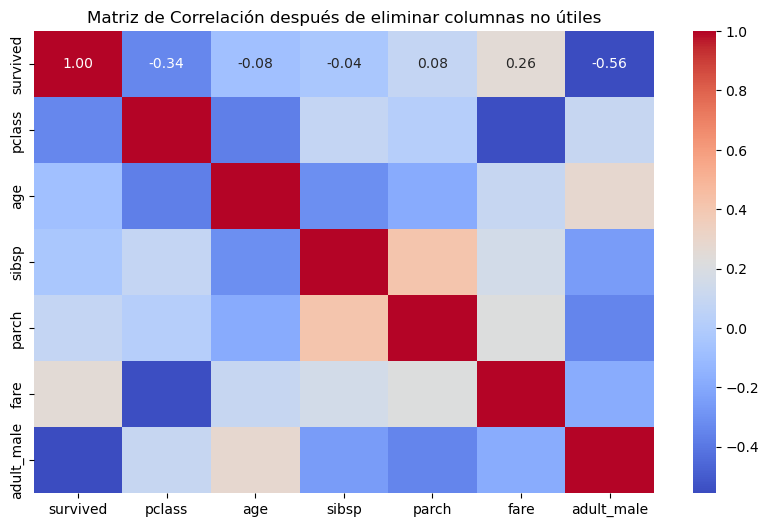

In [34]:
#Para calcular la matriz de correlación para las variables númericas, tengo que hacer un dataset eliminando las columnas que no necesito
# Eliminar columnas que no son útiles para la correlación
df_cleaned = df.drop(columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone'])

# Ahora que las columnas irrelevantes han sido eliminadas, podemos generar la matriz de correlación
correlation_matrix = df_cleaned.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap -> eso me lo propuso chatGPT
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación después de eliminar columnas no útiles')
plt.show()

## Ejercicio 7

Tablas de Contingencia:

Calcula una tabla de contingencia entre Pclass y Survived.

In [43]:
tabla = pd.crosstab(pd.Series(df["pclass"], name="Clase"), pd.Series(df["survived"], name="Sobreviviente"))
tabla

Sobreviviente,0,1
Clase,,
1,80,136
2,97,87
3,372,119
